In [2]:
import os
import sys
# Add the scripts folder to the Python path
sys.path.append(os.path.abspath("../scripts"))

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import custom modules
from select_metrics import InsuranceMetrics, get_hypothesis_metrics
from statistical_testing import analyze_risk_differences, compare_groups
from visualizations import plot_boxplot, plot_categorical_distribution, plot_scatter

In [6]:
# Load the data
data = pd.read_csv('data/cleaned_data.csv')

In [7]:
# Initialize metrics calculator
metrics = InsuranceMetrics(data)

In [8]:
# Display defined metrics for each hypothesis
print("Defined Metrics for Each Hypothesis:")
for metric in get_hypothesis_metrics():
    print(f"\nHypothesis: {metric['hypothesis']}")
    print(f"Primary Metric: {metric['primary_metric']}")
    print(f"Description: {metric['description']}")
    print(f"Business Impact: {metric['business_impact']}")

Defined Metrics for Each Hypothesis:

Hypothesis: Province Risk Differences
Primary Metric: risk_ratio
Description: Claims to Premium ratio by province
Business Impact: Identifies high-risk geographic areas

Hypothesis: Zip Code Risk Differences
Primary Metric: risk_ratio
Description: Claims to Premium ratio by postal code
Business Impact: Enables granular geographic risk assessment

Hypothesis: Zip Code Margin Differences
Primary Metric: profit_margin
Description: Profit margin by postal code
Business Impact: Identifies areas of high/low profitability

Hypothesis: Gender Risk Differences
Primary Metric: risk_ratio
Description: Claims to Premium ratio by gender
Business Impact: Assesses risk patterns across gender groups


In [12]:
#Calculate and display overall KPIs
all_kpis = metrics.get_all_kpis()

print("\nRisk Metrics:")
for metric, value in all_kpis['risk_metrics'].items():
    print(f"{metric}: {value:.4f}")

print("\nProfit Metrics:")
for metric, value in all_kpis['profit_metrics'].items():
    print(f"{metric}: {value:.4f}")


Risk Metrics:
total_risk_ratio: 1.0477
avg_risk_ratio: 0.3499
claims_frequency: 0.0028

Profit Metrics:
total_profit_margin: -0.0477
avg_profit_margin: 0.6501
revenue_per_customer: 61.9055


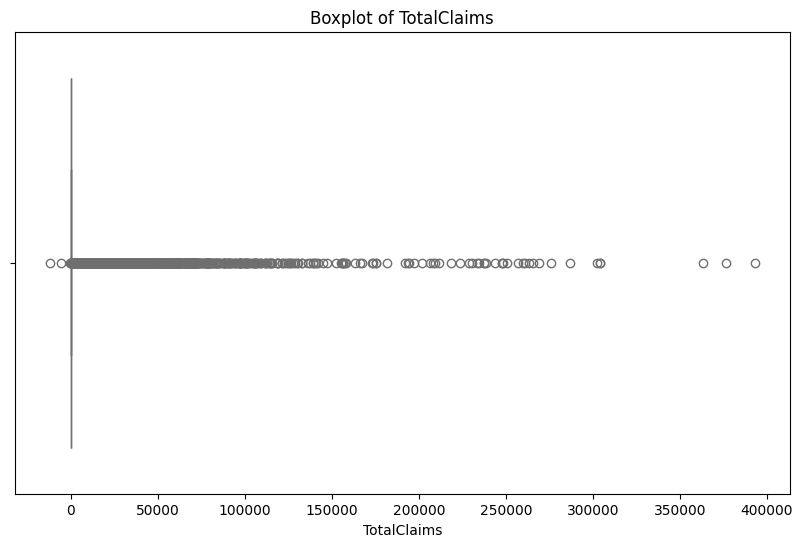

In [13]:
#Visualize risk distribution by province
province_metrics = metrics.geographic_metrics('Province')
plot_boxplot(
    data=data,
    column_name='TotalClaims',
    save_path=None  # Set to None to display in notebook
)

d:\Kifya_training\Week 3\Week 3\AlphaCare-Insurance-Analysis\scripts\visualizations.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette="Set2")


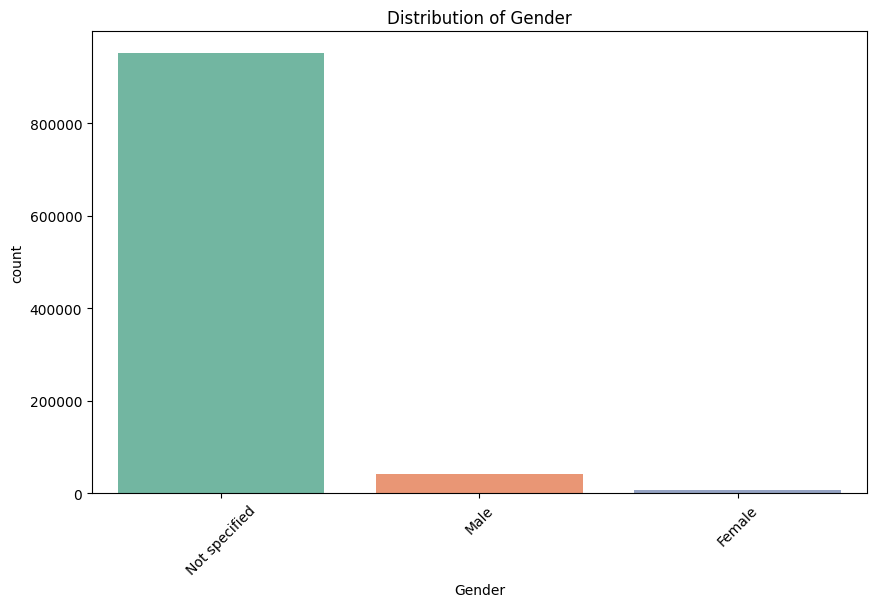

In [14]:
# Visualize gender distribution
plot_categorical_distribution(
    data=data,
    column_name='Gender',
    save_path=None  # Set to None to display in notebook
)